# Data Set


---


---




# . About the data set :


> **This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker**






**Age**: Describes the age of individuals. Continuous.

**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
State-gov, Without-pay, Never-worked.

**FNLWGT**: Continuous.

**Education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**Education**-num: Number of years spent in education. Continuous.

**Marital-status** : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**Ocupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**Relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**Race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

**Capital-gain**: Continuous.

**Capital-loss:** Continuous.

**Hours-per-week**:Continuous.

**Native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Salary:** >50K,<=50K



> NOTE : FNLWGT (Final Weight) is a data element you might encounter in datasets related to demographics and income, particularly the UCI Machine Learning Repository's Adult Census Income dataset.


---




---




## Imports

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# SVM Model
from sklearn.svm import SVC

# For Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# For model evaluation
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

# For dimensionality reduction
from sklearn.decomposition import PCA

In [2]:
# read the data from a csv file
data = pd.read_csv('Data/adult.csv')

## Exploratory Data Analysis

In [3]:
# display the first 5 rows of the data
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# display the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Summary of the dataset shows that there are no missing values.

But the preview shows that the dataset contains values coded as `?`. So, We will drop them.

In [5]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# drop the rows with '?' values
data[data == '?'] = np.nan
data.dropna(inplace=True)

In [7]:
# Show the number of duplicated rows
data.duplicated().sum()

23

In [8]:
# drop the duplicated rows
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(30139, 15)

In [10]:
# Convert income values to binary representation: 0 for <=50K and 1 for >50K.
income_map = {'<=50K': 0, '>50K': 1}
data['income'] = data['income'].replace(income_map)

In [11]:
# Convert income values to binary representation: 0 for Male and 1 for Female.
income_map = {'Male': 0, 'Female': 1}
data['sex'] = data['sex'].replace(income_map)

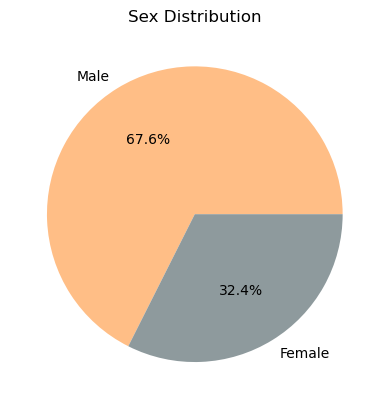

In [12]:
counts = data['sex'].value_counts()
plt.pie(counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['#FFBE86', '#8E9A9D'])
plt.title('Sex Distribution')
plt.show()

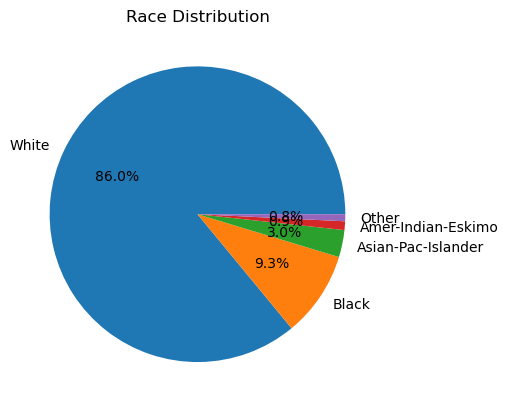

In [13]:
counts = data['race'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Race Distribution')
plt.show()

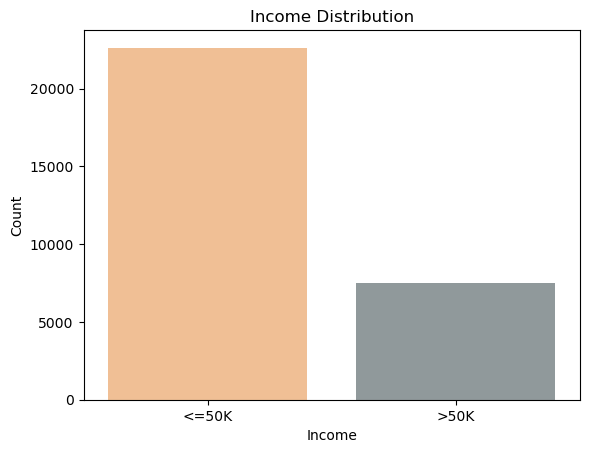

In [14]:
sns.countplot(x='income', data=data, palette=['#FFBE86', '#8E9A9D'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

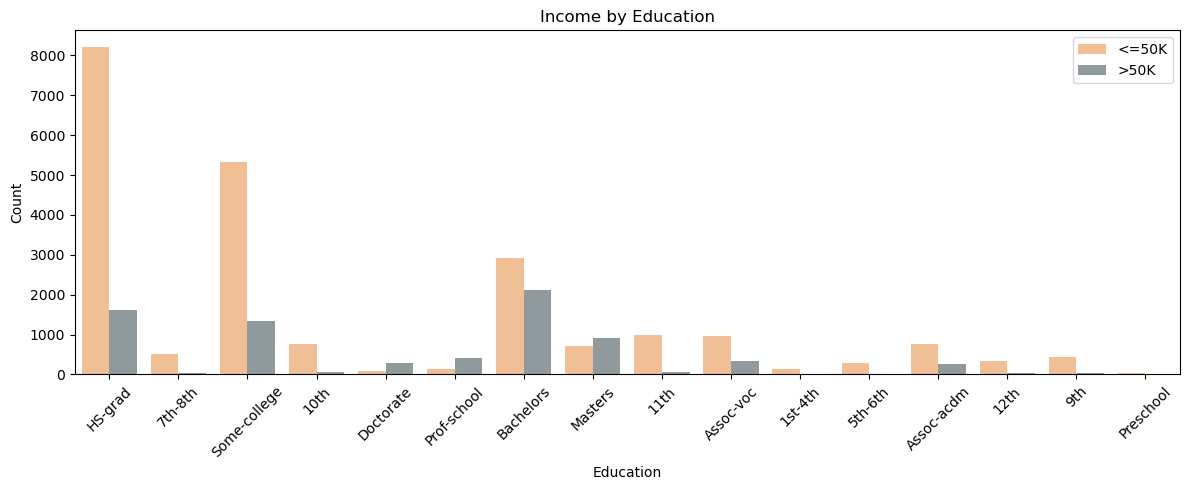

In [15]:
plt.figure(figsize =(12, 5))
sns.countplot(x='education', hue='income', data=data, palette=['#FFBE86', '#8E9A9D'])
plt.title('Income by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['<=50K', '>50K'])
plt.tight_layout()
plt.show()

- There is a growth in the proportion of people whose income is larger than 50k the higher the education attained gets.

- The growth is almost non-existent for the first few levels from pre-school to 12th.

- For the Masters and Doctorate category, the number of people who earn more than 50k is higher than the people who earn less than 50k.

Overall, we can see that there is indeed a correlation between the income variable and the level of education attained.

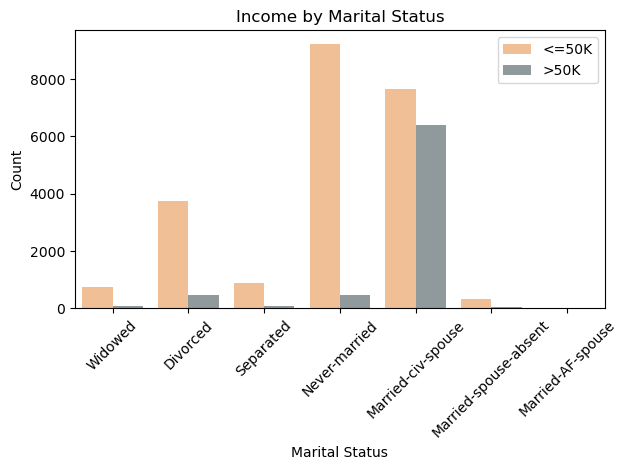

In [16]:
sns.countplot(x='marital.status', hue='income', data=data, palette=['#FFBE86', '#8E9A9D'])
plt.title('Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['<=50K', '>50K'])
plt.tight_layout()
plt.show()

- The number of people whose income is lesser than 50k is significantly higher than the number of people who earn more than or equal to 50k for all of the statuses except Married-civ-spouse. 

- For the status Married-civ-spouse, the number of people who earn more or equal to 50k is close to the number of people who earn less. This may be because as a spouse, being able to provide for the family or children would normally require an income higher than 50k. 

Overall, this variable shows correlation as well to the income variable.

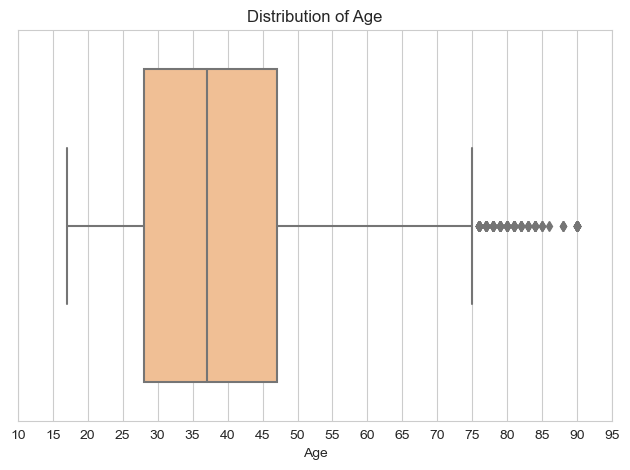

count    30139.000000
mean        38.441720
std         13.131426
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


In [17]:
sns.set_style(style='whitegrid')
sns.boxplot(x='age', data=data, color='#FFBE86')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.xticks(np.arange(10, 100, 5))
plt.tight_layout()
plt.show()

print(data['age'].describe())

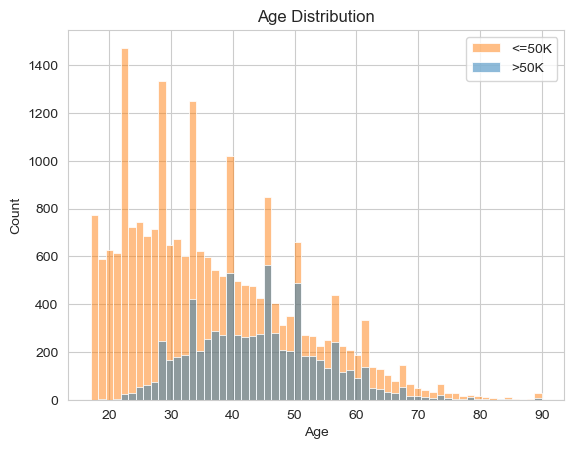

In [18]:
sns.histplot(x='age', hue='income', hue_order=[1, 0], data=data);
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'])
plt.show()

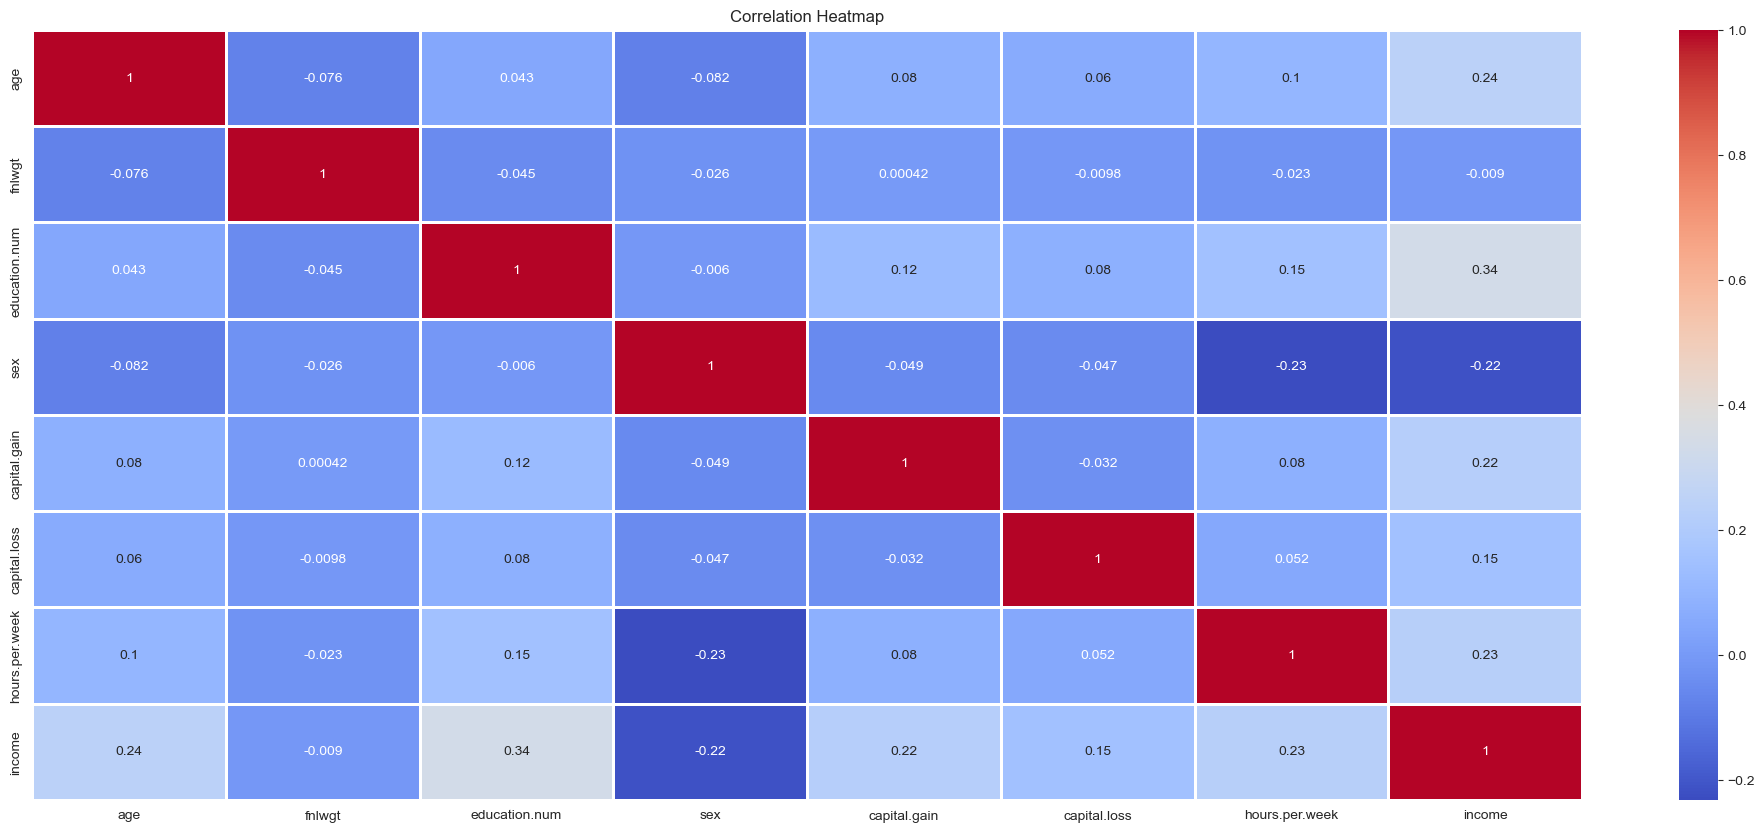

In [19]:
numeric_columns = data.select_dtypes(include=['int64']).columns
plt.figure(figsize=(25, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()

- The pair of variables with the highest correlation would be the `"education.num"` and `"income"`. This makes sense as we've observed earlier that there is indeed a difference in the income variable the higher the level of attained education becomes. 

- Another noticeable pair would be `"income"` and `"age"`, this is understandable as the higher your age, the more likely 
that you've attained a higher position at a company. 

- The pair `"hours.per.week"` and `"income"` also has the same correlation as the previous pair. This makes sense as more hours per week renderred could affect the amount of income that you would obtain.

- The pair `"sex"` and `"income"` also has the same correlation as the previous pair.

- Lastly, the pair `"capital.gain"` and `"income"` is also correlated to each other. A higher capital gain could also indicate a higher income.

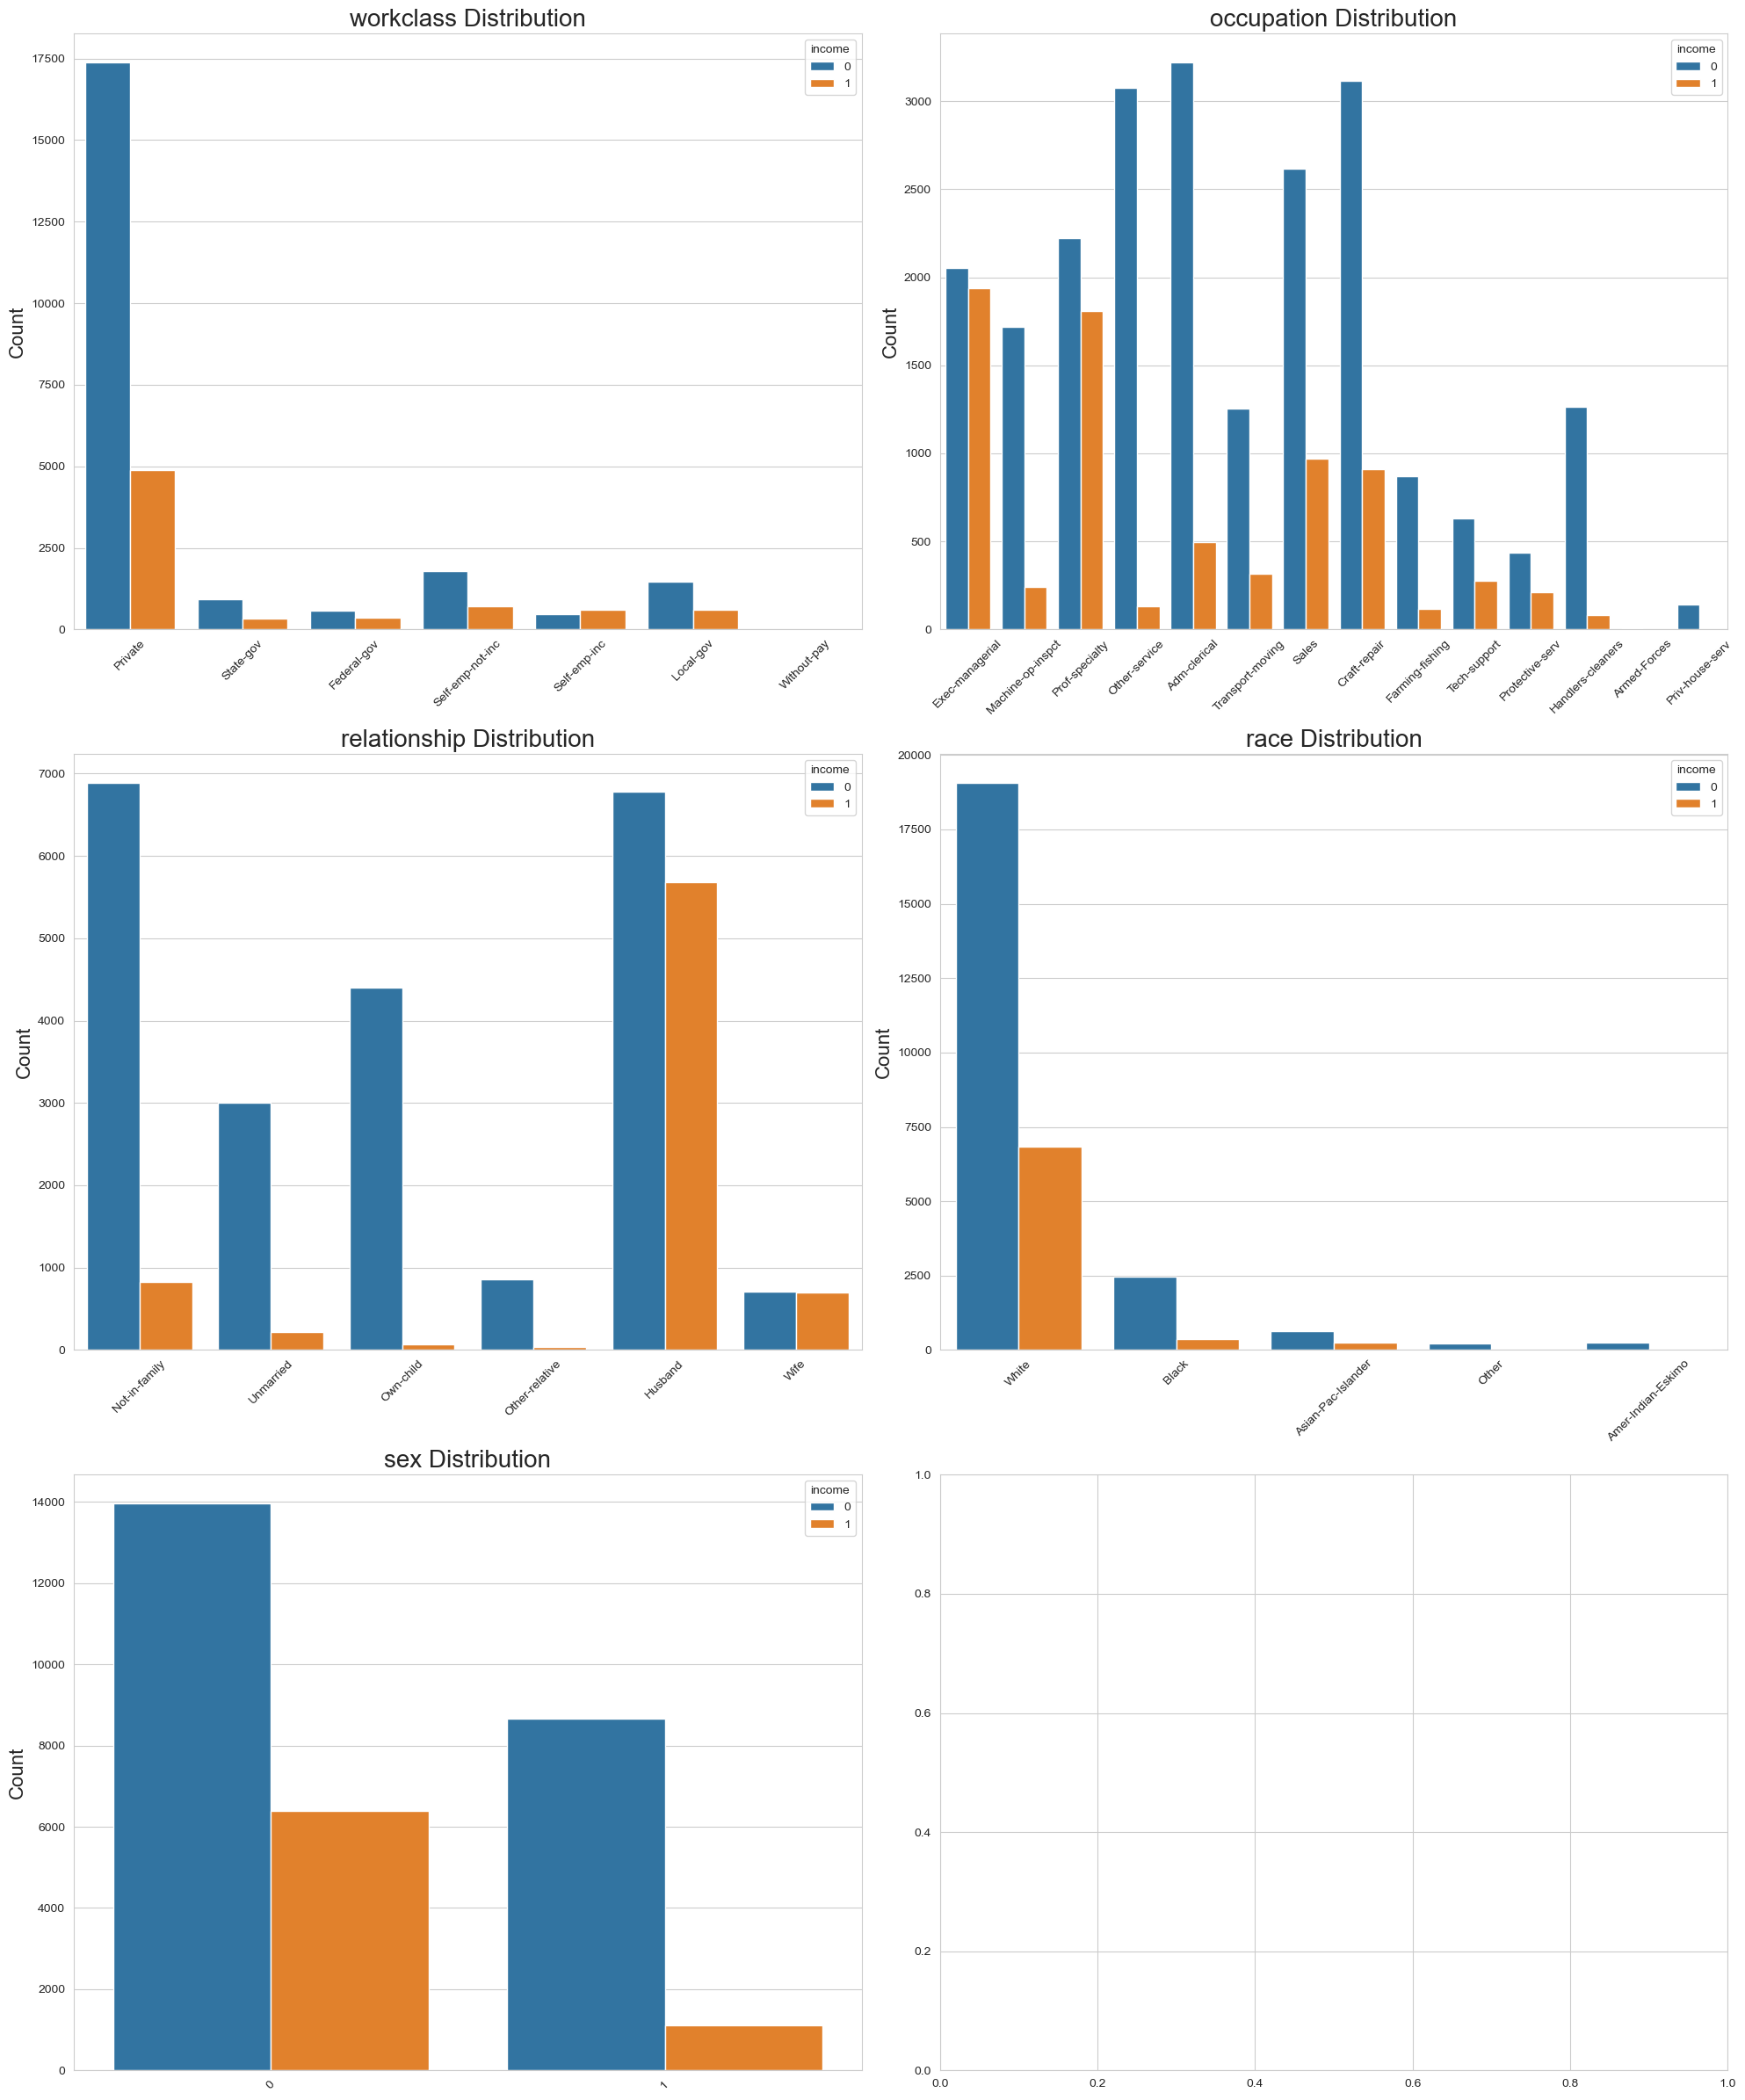

In [20]:
categorical_columns = ['workclass', 'occupation', 'relationship', 'race', 'sex']

# Number of rows and columns for the grid
num_cols = 2
num_rows = (len(categorical_columns) + 1) // num_cols


# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 24))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(x=column, hue='income', data=data, ax=axes[i])
    axes[i].set_title(f'{column} Distribution', fontsize=20)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count', fontsize=16)

plt.tight_layout()
plt.show()

## Feature Engineering

#### Encode Categorical Variables

In [21]:
le = preprocessing.LabelEncoder()
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

for feature in categorical_features:
        data[feature] = le.fit_transform(data[feature])

#### Setting features vector and target variable

In [22]:
X = data.drop(['income', 'education'], axis=1)

y = data['income']

#### Split data into training and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [24]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [25]:
X_train.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.949199,-0.211129,-1.134867,-0.441091,-1.728632,-0.988105,1.611314,0.388467,-0.695327,-0.147738,-0.220183,-1.748945,0.267582
1,-0.184298,-0.211129,-0.225251,-1.224440,-0.390836,-0.988105,-0.884415,0.388467,-0.695327,-0.147738,-0.220183,-0.078711,0.267582
2,-0.031906,-0.211129,0.481915,-0.049416,-0.390836,1.244507,-0.884415,0.388467,-0.695327,-0.147738,-0.220183,1.173964,0.267582
3,1.873003,-2.296989,-1.419180,2.300631,-1.728632,-0.740037,-0.260483,0.388467,1.438172,-0.147738,6.066950,1.591523,0.267582
4,-1.555832,-0.211129,-0.191735,-0.441091,0.946961,0.252235,0.987382,0.388467,1.438172,-0.147738,-0.220183,-1.748945,0.267582


### Train the Support Vector Classifier without Hyper-parameter Tuning

In [26]:
# train the model on train set 
model = SVC()
model.fit(X_train, y_train) 

SVC()

#### Evaluation

In [27]:
# print prediction results 
y_pred = model.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred)) 

Accuracy: 84.22%
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4515
           1       0.76      0.54      0.63      1513

    accuracy                           0.84      6028
   macro avg       0.81      0.74      0.77      6028
weighted avg       0.84      0.84      0.83      6028



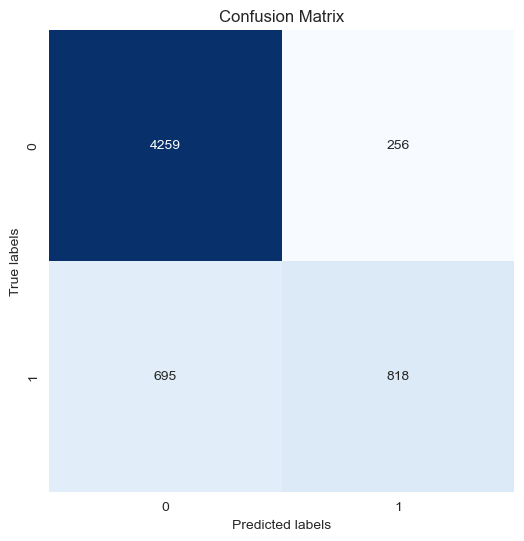

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Tuning the hyper-parameters using GridsearchCV

In [29]:
# # defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001], 
#               'kernel': ['rbf', 'linear', 'poly']}  

  
# grid = GridSearchCV(SVC(), param_grid, verbose = 5) 
  
# # fitting the model for grid search 
# grid.fit(X_train, y_train) 

In [30]:
# # print best parameter after tuning 
# best_params = grid.best_params_
# print(best_params) 
  
# # print how our model looks after hyper-parameter tuning 
# best_estimator = grid.best_estimator_
# print(best_estimator) 

In [31]:
tuned_model = SVC(kernel='rbf', C=1, gamma=0.1)
tuned_model.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

#### Evaluation

In [32]:
tuned_model_pred = tuned_model.predict(X_test)

# print Accuracy
accuracy = accuracy_score(y_test, tuned_model_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# print classification report 
print(classification_report(y_test, tuned_model_pred)) 

Accuracy: 84.44%
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4515
           1       0.76      0.55      0.64      1513

    accuracy                           0.84      6028
   macro avg       0.81      0.75      0.77      6028
weighted avg       0.84      0.84      0.84      6028



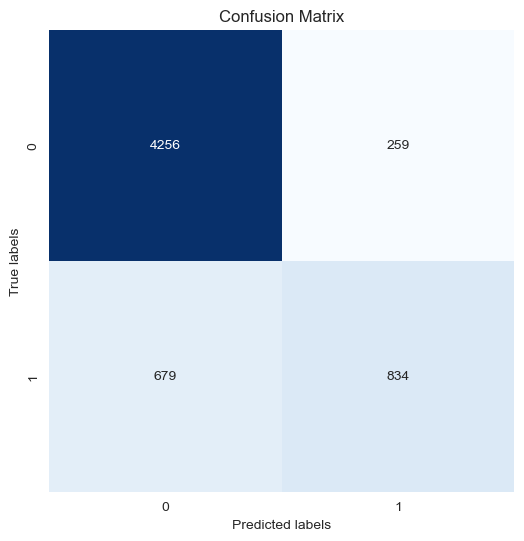

In [33]:
cm = metrics.confusion_matrix(y_test, tuned_model_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## PCA

In [34]:
pca = PCA()
pca.fit(X_train)

PCA()

In [35]:
explained_variance_ratio = pca.explained_variance_ratio_
cummulative_variance = np.cumsum(explained_variance_ratio)
dim = np.argmax(cummulative_variance >= 0.90)

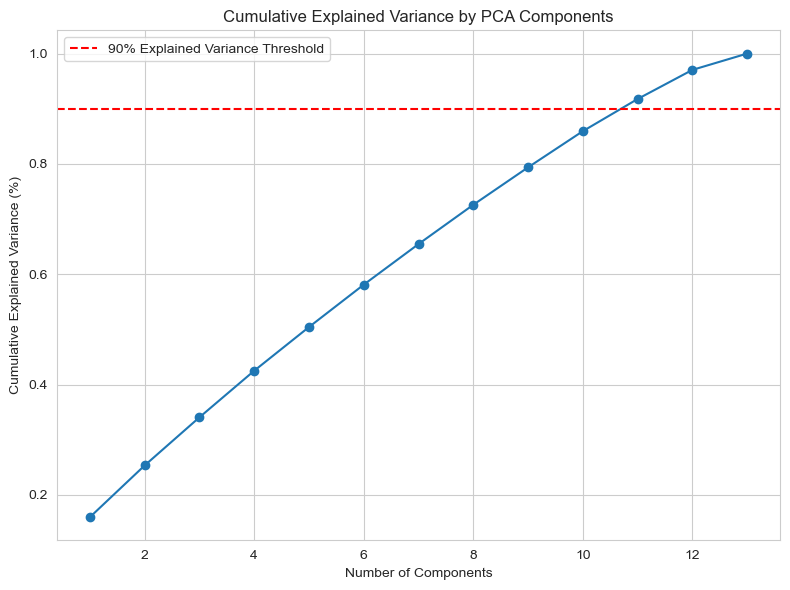

The number of dimensions required to preserve 90% of variance is 10


In [36]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))  
plt.plot(range(1, len(cummulative_variance) + 1), cummulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)

plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance Threshold')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

print('The number of dimensions required to preserve 90% of variance is', dim)

In [37]:
pca = PCA(n_components=dim)
X_pca = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

#### Fit SVM Model After PCA

In [38]:
model_pca = SVC(kernel='rbf', C=1, gamma=0.1)
model_pca.fit(X_pca, y_train)

SVC(C=1, gamma=0.1)

#### Evaluation

In [39]:
predicted_pca = model_pca.predict(X_pca_test)

# print Accuracy
accuracy = accuracy_score(y_test, predicted_pca)
print(f"Accuracy: {accuracy * 100:.2f}%")

# print classification report 
print(classification_report(y_test, predicted_pca)) 

Accuracy: 83.97%
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4515
           1       0.77      0.51      0.62      1513

    accuracy                           0.84      6028
   macro avg       0.81      0.73      0.76      6028
weighted avg       0.83      0.84      0.83      6028



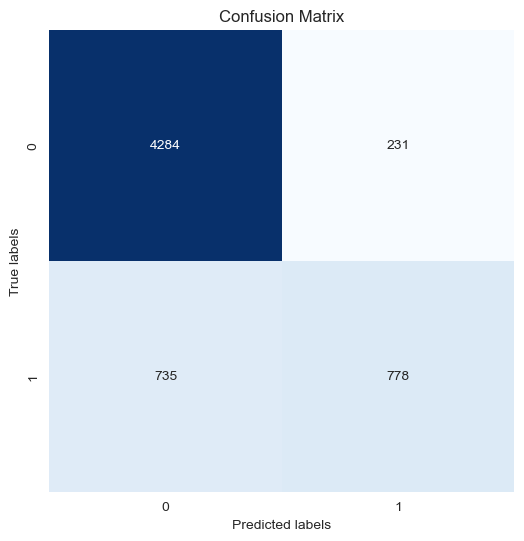

In [40]:
cm = metrics.confusion_matrix(y_test, predicted_pca)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()